<a href="https://colab.research.google.com/github/vvrgit/ML-Optimization/blob/main/MBGD_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

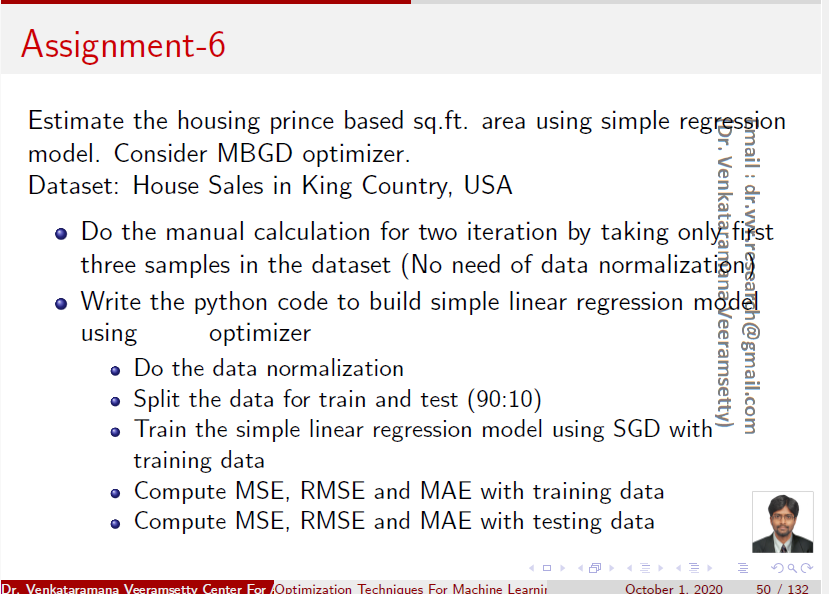

Dataset: https://drive.google.com/file/d/1pC0wRSmSf4bbluhW8E9Z-FVixfmiVapy/view?usp=drive_link

In [1]:
import numpy as np
import math as mt
import random
import pandas as pd

In [12]:
data = pd.read_csv('/content/Housing.csv')
data.head()

,price,area
0,13300000,7420
1,12250000,8960
2,12250000,9960
3,12215000,7500
4,11410000,7420


In [13]:
area_min=data['area'].min()
area_max=data['area'].max()
price_min=data['price'].min()
price_max=data['price'].max()

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)
data_norm=scaler.transform(data)
data_norm

array([[1.        , 0.39656357],
       [0.90909091, 0.5024055 ],
       [0.90909091, 0.57113402],
       ...,
       [0.        , 0.13539519],
       [0.        , 0.08659794],
       [0.        , 0.15120275]])

In [15]:
import pandas as pd
data_norm=pd.DataFrame(data_norm,columns=['price','area'])
data_norm.head()

,price,area
0,1.000000,0.396564
1,0.909091,0.502405
2,0.909091,0.571134
3,0.906061,0.402062
4,0.836364,0.396564


In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_norm.area, data_norm.price, test_size = 0.10, random_state = 10)

In [23]:
m=random.uniform(-10,10)
c=random.uniform(-10,10)
eta=0.9
max_iter=100
batch_size = 10

In [25]:
n_minibatches = data.shape[0] // batch_size
x=x_train
y=y_train
def create_mini_batches(x,y,batch_size):
    mini_batches = []
    global n_minibatches
    for i in range(n_minibatches): #[0]
        X_mini = x[i * batch_size : (i + 1) * batch_size]
        Y_mini = y[i * batch_size : (i + 1) * batch_size]
        mini_batches.append((X_mini, Y_mini))

    if x.shape[0] % batch_size != 0:
      X_mini = x[(i+1) * batch_size: x.shape[0]]
      Y_mini = y[(i+1) * batch_size: y.shape[0]]
      mini_batches.append((X_mini,Y_mini))
    return mini_batches

mini_batches_all = create_mini_batches(x,y,batch_size)

In [26]:
def gradient(m,c,x_train,y_train):
  m_deriv=0
  c_deriv=0
  for i in range(len(x_train)):
    m_deriv=m_deriv-(y_train.iloc[i]-m*x_train.iloc[i]-c)*x_train.iloc[i]
    c_deriv=c_deriv-(y_train.iloc[i]-m*x_train.iloc[i]-c)
  m_deriv=m_deriv/len(x_train)
  c_deriv=c_deriv/len(x_train)
  return m_deriv,c_deriv

In [31]:
for iter in range(max_iter):
  for i in range(n_minibatches):
    x_1, y_1 = mini_batches_all[i]
    print(i)
    print(len(x_1))
    del_m, del_c = gradient(m, c, x_1, y_1)
    del_m = -eta * del_m
    del_c = -eta * del_c
    m += del_m
    c += del_c
    print(f"Iteration: {iter}\tValue of m: {m}, \tValue of c: {c}")

print(m,c)

0
10
Iteration: 0	Value of m: 0.40195369218043825, 	Value of c: 0.10940907144800904
1
10
Iteration: 0	Value of m: 0.4065794422468657, 	Value of c: 0.11577881531386673
2
10
Iteration: 0	Value of m: 0.42429456178020614, 	Value of c: 0.15723562680190495
3
10
Iteration: 0	Value of m: 0.4232796011625175, 	Value of c: 0.1469489549443781
4
10
Iteration: 0	Value of m: 0.42209215445893417, 	Value of c: 0.15449327446114963
5
10
Iteration: 0	Value of m: 0.4126021086775066, 	Value of c: 0.13144629206896183
6
10
Iteration: 0	Value of m: 0.4127665347472841, 	Value of c: 0.14485675344557672
7
10
Iteration: 0	Value of m: 0.41432324592484726, 	Value of c: 0.1449075179633622
8
10
Iteration: 0	Value of m: 0.43273927288604846, 	Value of c: 0.17621198416100817
9
10
Iteration: 0	Value of m: 0.4245557808588975, 	Value of c: 0.18368770495581271
10
10
Iteration: 0	Value of m: 0.4178318401629323, 	Value of c: 0.15453432999735675
11
10
Iteration: 0	Value of m: 0.42278538815861416, 	Value of c: 0.1865390500688985

ZeroDivisionError: ignored

In [33]:
for iter in range(1):
  for i in range(n_minibatches):
    x_1, y_1 = mini_batches_all[i]
    print(i)
    print(len(x_1))


0
10
1
10
2
10
3
10
4
10
5
10
6
10
7
10
8
10
9
10
10
10
11
10
12
10
13
10
14
10
15
10
16
10
17
10
18
10
19
10
20
10
21
10
22
10
23
10
24
10
25
10
26
10
27
10
28
10
29
10
30
10
31
10
32
10
33
10
34
10
35
10
36
10
37
10
38
10
39
10
40
10
41
10
42
10
43
10
44
10
45
10
46
10
47
10
48
10
49
0
50
0
51
0
52
0
53
0
